# Lecture 2. 다중회귀분석(Multiple Linear Regression) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
# import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
data_path = "../data/"
ad = pd.read_csv(data_path + "Advertising.csv")

### Example: Advertising 
- TV광고 외에 라디오와 신문광고에 대한 지출도 활용하여 sales를 설명하고 싶음 
- 설명변수 각각을 사용하여 3개의 단순회귀분석 사용??  (No!)
    - 서로 다른 광고매체의 예산은 다른 회귀방정식과 연관 
$$ y_i= \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \cdots + \beta_p x_{pi} +\epsilon_i $$

## 2.1 회귀계수의 추정 
- 추정된 회귀식
$$ \hat y_i = \hat  \beta_0 + \hat\beta_1 x_{1i} + \hat\beta_2 x_{2i} + \cdots +\hat \beta_p x_{pi} $$

- RSS를 최소화 하는 최소제곱법 사용 
$$ RSS=\sum (y_i - \hat y)^2 = \sum (y_i - \hat \beta_0 - \hat \beta_1 x_{i1} - \cdots - \hat \beta_p x_{ip})^2 $$

<img src='http://drive.google.com/uc?export=view&id=1aXBr2nn7CYgchvqbIr_MsvDV5jiGCvE-' width=50%/><br>

In [2]:
model1 = smf.ols('Sales ~ TV', data = ad).fit() # simple linear regression
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           1.47e-42
Time:                        16:41:05   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
model2 = smf.ols('Sales ~ Radio + Newspaper + TV', data = ad).fit() # multiple linear regression
model2.summary()

# coef : 추정된 회귀계수, std err : 표준오차(모델의 불확실성 의미)
# Newspaper은 t value가 크므로 p value가 커서 귀무가설을 채택 => B2계수는 통계적으로 유의하지 않다
# Newspaper이 1단위 증가해도 Sales는 변화하지 않는다 => 유의하지 않은 변수

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        16:41:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
TV             0.0458      0.001     32.809      0.000       0.043       0.049
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
## 시험문제!!
# coef / std err = t value
0.1885 / 0.009

20.944444444444446

## 2.2 모델의 유의성 평가: F 검정 
- $Y$와 $X$들 사이에 상관관계가 있는가? 
$$ H_0: \beta_1=\beta_2 =\cdots =\beta_p=0$$
$$ H_1: \mbox{적어도 하나의 }\beta_j \mbox{는 0이 아니다.}$$

- F  통계량 
    $$F=\frac{(TSS-RSS)/p}{RSS/(n-p-1)} \sim F_{p, n-p-1}$$
    - $H_0$가 사실이면 $F=1$ 
    - F=570에 대한 p-value가 0에 가까움: 광고매채 중 적어도 하나는 판매량 증가와 상관관계가 있다는 아주 강한 증거 



## 2.3  회귀계수의 검정: T 검정
- 다른 설명변수의 효과를 조정했을 때 $X_i$가 Y와 상관관계가 있는가?
$$ H_0: \beta_i=0$$
$$ H_1: \beta_i \neq 0$$ 

- t  통계량 
$$ \frac{\hat \beta_i }{SE(\hat \beta_i)} \sim t_{n-p-1}$$
- TV와 radio의 p-value<0.05: sales를 설명하는데 유의하다.
- Newspaper의 p-value>0.05: sales를 설명하는데 유의하지 않다.
    - **TV와 라디오 광고가 모형에 포함되어 있을 경우** 신문 광고는 sales와 상관성이 있다는 증거가 없다고 결론
    - 왜? 라디오 광고에 지출을 많이 하는 마켓일 수록 신문 광고에도 더 많이 지출하는 경향이 있음
    - 그렇다면 Newspaper와 Sale의 단순 회귀모형의 결과는 어떨까?


    

In [5]:
model3 = smf.ols('Sales ~ Newspaper', data = ad).fit()
model3.summary().tables[1]

# Newpaper이 1단위 증가하면 Sales는 변화한다 => 유의한 변수

# 다중회귀 모형에서는 Newspaper가 유의하지 않은 변수, 단순회귀 모형에서는 유의한 변수
# => 다중공선성 때문에 다중회귀 모형에서는 유의하지 않은 변수로 나온다

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


- Newspaper와 sales의 단순회귀모형에서는 회귀계수가 유의하다는 결과가 나온다.
- 신문광고에 의한 판매량이라고 보이는 것이 실제로는 라디오 광고에 의한 것


In [6]:
# 변수간 상관관계
ad.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000




#### 회귀계수의 해석 
- $\beta_i$는 _**모든 다른 독립변수가 일정할 때**_ $x_i$의 1단위 변화에 대한 $y$값 변화의 추정치

- 다른 매체에 대한 광고지출액이 일정할 때 TV광고에 1000달러 지출을 증가시키면 판매량은  45.8 unit 증가할 것이다.

- 다른 매체에 대한 광고지출액이 일정할 때 Radio광고에 1000달러 지출을 증가시키면 판매량은 188.5 unit  증가할 것이다.

## 2.4 예측
- 추정된 회귀식에 의해 예측 
$$\hat Y= \hat \beta_0 + \hat \beta_1 X_1 + \cdots + \hat \beta_p X_p $$


   

In [7]:
model4 = smf.ols('Sales ~ Radio + TV', data = ad).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9211,0.294,9.919,0.000,2.340,3.502
Radio,0.1880,0.008,23.382,0.000,0.172,0.204
TV,0.0458,0.001,32.909,0.000,0.043,0.048


In [8]:
pred = model4.get_prediction(exog = dict(TV=100, Radio=20))
pred.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,11.256466,0.137526,10.985254,11.527677,7.929616,14.583316



- 신뢰구간 
    - 수많은 도시에 대한 평균 판매량을 둘러싼 불확실성을 수량화
    - TV광고에 10만달러, Radio광고에 2만달러를 지출한다면 판매량의 평균은 10985개와 11528개 사이일 것으로 95% 확신함

- 예측구간
    - 특정 도시의 판매량에 대한 불확실성을 수량화
    - TV광고에 10만달러, Radio광고에 2만달러를 지출한 도시에서 판매량은 7930개와 14583개 사이일 것으로 95% 확신함  
  

 


## 2.5 회귀모형의 잠재적 문제: 회귀진단 
### 2.5.1   데이터의 비선형성 
- 잔차그래프의 확인 
    - $e_i=y_i - \hat y_i$ vs. $x_i$ 의 그래프를 확인
    - 모델이 이상적이라면 인지할만한 패턴이 존재하지 않는다.
    - 잔차 그래프가 비선형 상관성이 있다면 $\log X, \sqrt X, X^2$과 같이 설명변수들을 비선형적으로 변환하여 회귀모델에 적용하는 것이 간단한 접근법 
        

In [9]:
auto = pd.read_csv(data_path +"Auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


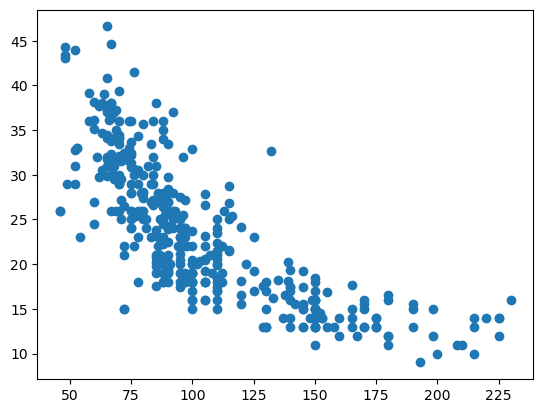

In [11]:
# 선형 회귀를 돌리기 전에 상관관계를 먼저 확인해봐야함
plt.scatter(auto.horsepower,auto.mpg)
plt.show()

In [12]:
model_auto = smf.ols('mpg~horsepower', data = auto).fit()
model_auto.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.9359,0.717,55.660,0.000,38.525,41.347
horsepower,-0.1578,0.006,-24.489,0.000,-0.171,-0.145


In [13]:
# hat(y_i) = hat(B_0) + hat(B_1)X_i
# residual = y_i - hat(y_i)
model_auto.resid

0      -1.416046
1       1.108520
2       1.740849
3      -0.259151
4      -0.837598
         ...    
387     0.638786
388    12.272065
389     5.323097
390     0.533873
391     4.007407
Length: 392, dtype: float64

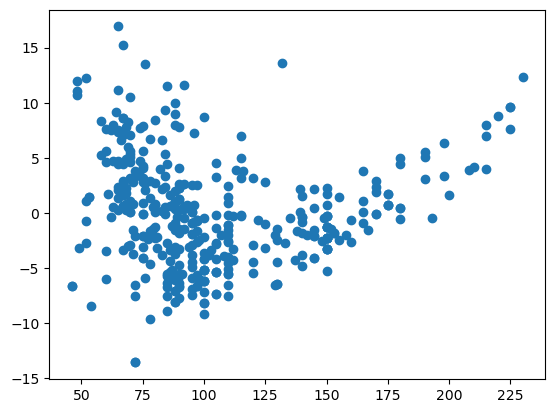

In [15]:
# 선형 회귀를 돌리기 전에 상관관계 먼저확인
plt.scatter(auto.horsepower,model_auto.resid)
plt.show()

In [17]:
# polynomial reg(다항 회귀식) => 2차항 추가
model_auto2 = smf.ols('mpg~horsepower+np.square(horsepower)', data = auto).fit()
model_auto2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
np.square(horsepower),0.0012,0.000,10.080,0.000,0.001,0.001


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30288\1956603319.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


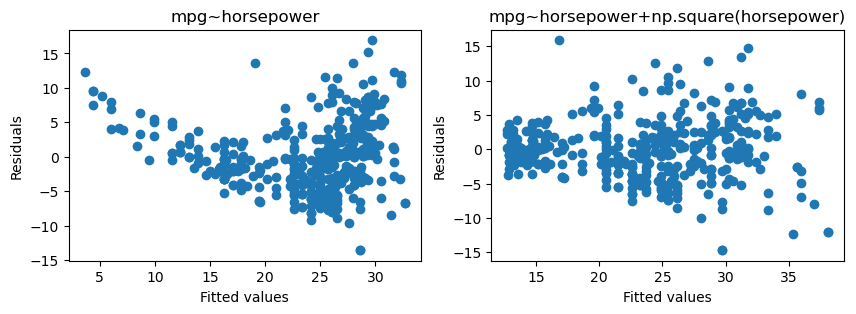

In [18]:
plt.figure(figsize=(10, 3))

plt.title('mpg~horsepower')
plt.subplot(1,2,1)
plt.scatter(model_auto.fittedvalues, model_auto.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('mpg~horsepower')

plt.subplot(1,2,2)
plt.scatter(model_auto2.fittedvalues, model_auto2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('mpg~horsepower+np.square(horsepower)')
plt.show()

In [19]:
model_auto.rsquared, model_auto2.rsquared

(0.6059482578894348, 0.6875590305127516)

### 2.5.2 오차항의 상관성 
- 선형모델의 가정: 오차항 $\epsilon_1, \epsilon_2, \ldots, \epsilon_n$이 서로 상관되어 있지 않다는 것 
- 오차항 사이에 상관성이 있으면 추정된 표준오차는 실제 표준오차를 과소추정하는 경향이 발생한다.
    - 계산된 95% 신뢰구간과 예측구간이 실제 모수를 포함할 가능성이 95%보다 낮을 수 있다. 
    - 모수가 통계적으로 유의하다 잘못된 결론을 내릴 수 있다.

- 시계열 데이터에서 자주 발생 
    - 잔차를 시간의 함수로 그렸을 때 인지할 만한 패턴이 없어야 한다. 

<img src='http://drive.google.com/uc?export=view&id=1ZjwmNStYGnMiw9WEuzFBuBPTwC_ZJ0MH' width=500/><br> 

#### Durbin-Watson 통계량 
$$ D = \frac{\sum_t (e_t-e_{t-1})^2}{\sum_t e_t^2} \approx 2(1-r)$$ 
- $r$: sample autocorrelation
- $0<D<4$
- $D \approx 2$ : no autocorrelation
- $D \approx 0$ : positive serial correlation
- $D \approx 4$ : negative serial correlation

In [20]:
x_t = np.random.normal(0, 1, 200) # 독립표본
x_t[0] = 0
y_t = np.zeros(200)
for i in range(1, 200):
    y_t[i] = np.random.normal(y_t[i - 1], 1) # 자기상관이 있는 표본, 한 시점 앞에 있는 정규분포에서 출력

from statsmodels.stats.stattools import durbin_watson
print('Durbin-Watson statistics for x_t:', durbin_watson(x_t))
print('Durbin-Watson statistics for y_t:', durbin_watson(y_t))

Durbin-Watson statistics for x_t: 1.9134976644219384
Durbin-Watson statistics for y_t: 0.05707627004320538


In [16]:
durbin_watson(model_auto2.resid)

1.0782139387131278

### 2.5.3 오차항의 이분산성(heteroscedasticity)
- 선형모델의 가정: $Var(\epsilon_i)= \sigma^2$
- 잔차그래프에 깔때기 형태가 있는지 보고 식별 

#### 종속변수의 변환
- 예를 들면, $log(y)$한 뒤 회귀식을 적합

<img src='http://drive.google.com/uc?export=view&id=1qWMJojwzeKfbWmlayeeJogaIk46es9QD' width=500 /><br>    

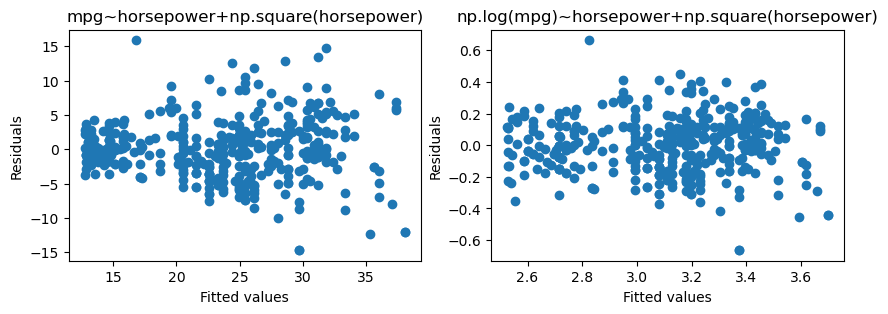

In [27]:
model_auto3 = smf.ols('np.log(mpg)~horsepower+np.square(horsepower)', data = auto).fit()
# print(model_auto3.summary())

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.scatter(model_auto2.fittedvalues, model_auto2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('mpg~horsepower+np.square(horsepower)')
plt.subplot(1,2,2)
plt.scatter(model_auto3.fittedvalues, model_auto3.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('np.log(mpg)~horsepower+np.square(horsepower)')
plt.show()

#### 가중최소제곱(weighted least squares; WLS) 방법

$$ Y_i = \beta_0 + \beta_1 X_i + \epsilon_i, ~~Var(\epsilon_i) = \sigma
_i^2, i=1,2,\cdots, n$$

- $1/\sigma_i^2$을 가중치로 하는 WLS 모형을 적합한다. 
- $\sigma_i^2$을 어떻게 계산하는가? 
    - 이론에 의해 알고 있는 경우 
    - 특정 변수에 따라 잔차의 분산이 커지는 경우 해당 변수의 역수(혹은 역수의 제곱)을 weight로 사용 
    - 잔차의 절대값을 종속변수로, fitted value를 설명변수로 하는 선형모형을 적합하여 그 모형의 적합값을 활용하여 weight로 설정


### 2.5.4 이상치(outlier)
- 모델이 예측한 값과 $y_i$가 크게 다른 점

<img src='http://drive.google.com/uc?export=view&id=1QpVG726vEZi2VhugMzaIe2Zpg5CGmphZ' /><br>

- 이 경우 이상치를 제거하는 것이 최소제곱선에 거의 영향을 주지 않음 

- 얼마나 커야 이상치라고 결정?
    - **스튜던트화 잔차(studentized residual)**: 잔차/추정표준오차 
    - $|\mbox{스튜던트화 잔차} |>3$이면 이상치라고 판정
    

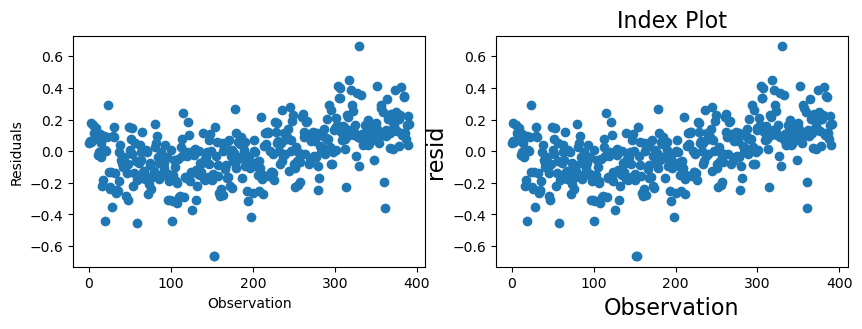

In [28]:
inf3 = OLSInfluence(model_auto3)
# inf3.summary_frame()
fig, ax = plt.subplots(1,2, figsize=(10, 3))
ax[0].scatter(auto.index,model_auto3.resid)
ax[0].set_xlabel('Observation')
ax[0].set_ylabel('Residuals')
inf3.plot_index('resid',threshold=3, ax = ax[1])
plt.show()

- 이상치 처리?
    - 이상치가 수집 또는 기록에 의한 오류에 의해 발생하였다면 관측치를 제외
    - 필요 설명변수가 없는 것과 같은 모델의 결함을 나타낼 수 있으므로 주의 

### 2.5.5 영향점 (Influential points) 
- 이상치: 주어진 $x_i$값에 대해 $y_i$ 값이 보통 수준과 다른 관측치
- 영향점: 추정회귀선에 영향을 많이 주는 관측치 

<img src='http://drive.google.com/uc?export=view&id=1MRJWP9beO9Leh6OAWaQj22LiF8ezJGYC' /><br>



#### 레버리지(leverage) 통계량
- 단순회귀분석의 경우 
$$ h_i = \frac 1 n + \frac {(x_i - \bar x)^2 }{\sum_{i'} (x_{i'} - \bar x )^2 }$$
-  $x_i$값이 $\bar x$에서 멀리 떨어져 있을 수록 레버리지 값이 크다.
- $h_i$의 평균은 $(p+1)/n$
- 레버리지와 residual이 동시에 크면 추정회귀선에 큰 영향을 준다. 

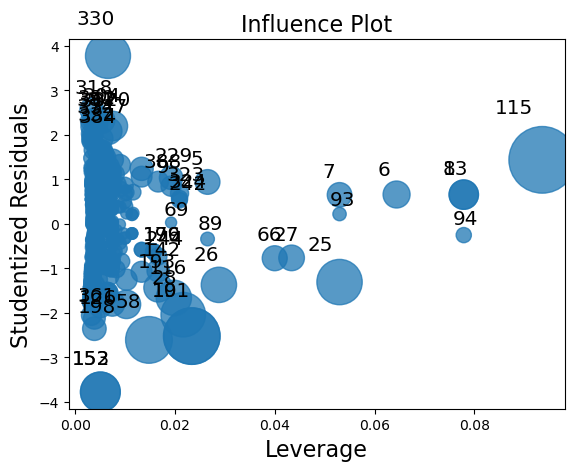

In [29]:

inf3.plot_influence()
plt.show()

#### Cook's distance 

$$ D_i = \frac{(y_i - \hat y_i )^2}{p\cdot MSE} \frac{h_i}{(1-h_{ii})^2}$$

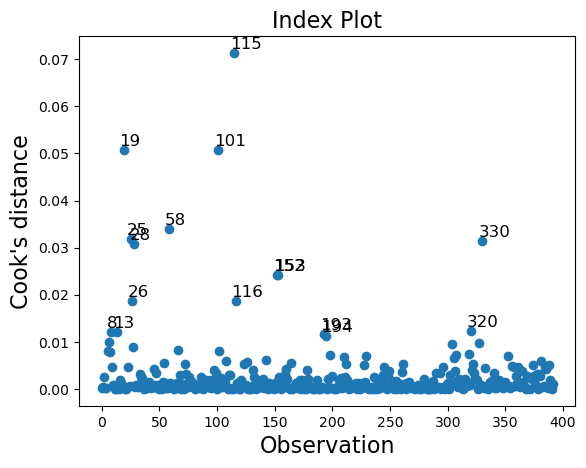

In [20]:
inf3.plot_index('cook',threshold=4/(model_auto3.nobs-2-1))
plt.show()

# 4/(n-p-1) 또는 4/n

### 2.5.6 다중공선성(multicollinearity)
- 두 개 또는 그 이상의 설명변수들이 서로 밀접하게 상관되어 있는 경우 
- Credit 데이터

In [21]:
credit = pd.read_csv(data_path+"Credit.csv", index_col=0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


<img src='http://drive.google.com/uc?export=view&id=1f4dN4KMJud7AmJ7P-dKH71A_TSD_yaE2' /><br>

- 공선성의 존재가 일으키는 문제
    - 각 변수들의 개별효과를 분리하기 어려움
    - 계수 추정치의 불확실성 증가: $\hat \beta_j$의 표준오차 증가, 가설검정 능력의 저하 

<img src='http://drive.google.com/uc?export=view&id=1YVjwE-A_2wU6FAZbW2YwTt5swtpsZ_b7' /><br>
   

In [22]:
model_credit = smf.ols('Balance~Age+Limit', data = credit).fit()
model_credit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-173.4109,43.828,-3.957,0.000,-259.576,-87.246
Age,-2.2915,0.672,-3.407,0.001,-3.614,-0.969
Limit,0.1734,0.005,34.496,0.000,0.163,0.183


In [23]:
model_credit2 = smf.ols('Balance~Rating+Limit', data = credit).fit()
model_credit2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-377.5368,45.254,-8.343,0.000,-466.505,-288.569
Rating,2.2017,0.952,2.312,0.021,0.330,4.074
Limit,0.0245,0.064,0.384,0.701,-0.101,0.150


- 공선성 검출 방법
    - 설명변수들의 상관계수 행렬 관찰 
        - 상관계수의 절대값이 크면 공선성 발생 가능
        - 모든 공선성 문제가 상관계수 행렬에 의해 발견 가능하지 않음
        - 다중공선성(multicollinearity): 세 개 또는 그 이상의 변수들 사이에 공선성 존재 가능
    - 분산팽창인수(VIF; variance inflation factor) 계산 
        $$ VIF(\hat \beta_j) = \frac {1}{1-R^2_{X_j | X_{-j}}}$$
        - $R^2_{X_j | X_{-j}}$: $X_j$를 다른 모든 설명변수들에 적합한 회귀모델의 $R^2$
        - 가능한 가장 작은 값=1: 공선성이 전혀 없음
        - VIF가 5 또는 10을 초과하면 공선성 존재한다고 경험적으로 판단 
        
      

In [24]:
model_credit3 = smf.ols('Balance~Age+Rating+Limit', data = credit).fit()
import patsy
y, X = patsy.dmatrices('Balance~Age+Rating+Limit', credit, return_type='matrix')

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 23.80295451367821
VIF of Age : 1.0113846860681328
VIF of Rating : 160.66830095856935
VIF of Limit : 160.59287978597942




- 공선성의 해결
    - 문제가 있는 변수들 중의 하나를 제거 
        - 회귀적합에 별로 나쁜 영향을 주지 않음 
    - 변수선택 방법 사용 
    - 공선성 변수들을 단일 설명변수로 결합 
        - 새로운 변수 생성
        - 주성분분석 활용 
        